In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [31]:
res = pd.read_feather('./monocasting_results.feather').replace(
    {
        'mono_casting': {'depth': 'Depth', 'prob': 'Weighted'},
        'bdry_cleaning': {'absorb': 'Absorb', 'none': 'Default', 'kde': 'KDE'},
        'leveling': {'unique': 'Default', 'mean_shift': 'Mean Shift'},
    }
).rename(columns={'mono_casting': 'P(t|H)', 'bdry_cleaning': 'B Clean-up', 'leveling': 'Level'})

res.head()

,tid,P(t|H),B Clean-up,Level,num_levels,num_boundaries,t_reduced_p,t_reduced_r,t_reduced_f,t_full_p,t_full_r,t_full_f
0,2,Depth,Absorb,Default,7,19,0.194296,0.446448,0.270757,0.471532,0.460690,0.466048
1,2,Depth,Absorb,Mean Shift,4,19,0.354247,0.443617,0.393927,0.516277,0.456263,0.484418
2,2,Depth,KDE,Default,15,15,0.200321,0.504673,0.286802,0.480114,0.468452,0.474211
3,2,Depth,KDE,Mean Shift,3,15,0.415838,0.503123,0.455335,0.509139,0.467448,0.487403
4,2,Depth,Default,Default,11,36,0.216559,0.457973,0.294065,0.466988,0.471645,0.469305


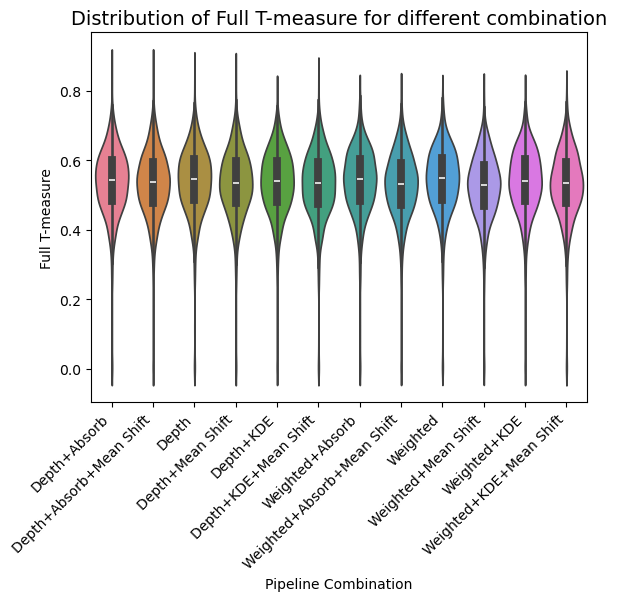

In [62]:
full_combo = res.pivot_table(
    index=['tid'], 
    columns=['P(t|H)', 'B Clean-up', 'Level'], 
    values='t_full_f'
).reset_index()

new_columns = ['+'.join([f for f in col if f not in ('', 'Default')]) for col in full_combo.columns.values]
full_combo.columns = new_columns
full_combo.columns.name = 't_full_f'

sns.violinplot(data=full_combo)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Full T-measure for different combination', fontsize=14)
plt.ylabel('Full T-measure')
plt.xlabel('Pipeline Combination')
plt.savefig('fullT_violin.pdf', bbox_inches='tight')

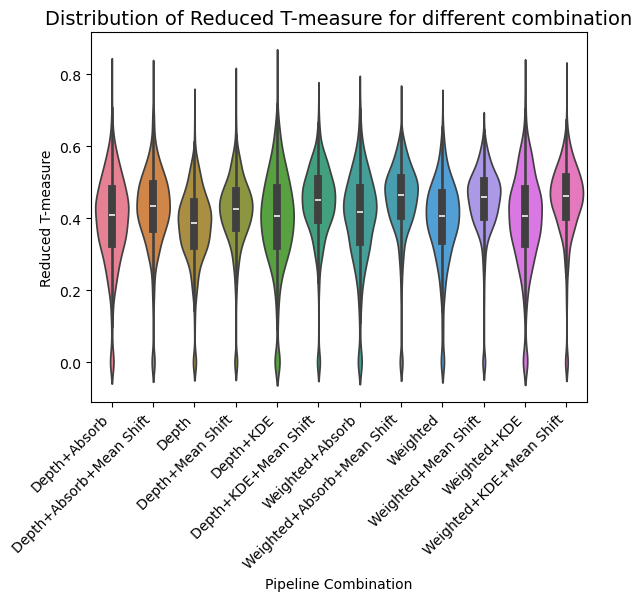

In [63]:
reduced_combo = res.pivot_table(
    index=['tid'], 
    columns=['P(t|H)', 'B Clean-up', 'Level'], 
    values='t_reduced_f'
).reset_index()

new_columns = ['+'.join([f for f in col if f not in ('', 'Default')]) for col in reduced_combo.columns.values]
reduced_combo.columns = new_columns
reduced_combo.columns.name = 't_reduced_f'

sns.violinplot(data=reduced_combo)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Reduced T-measure for different combination', fontsize=14)
plt.ylabel('Reduced T-measure')
plt.xlabel('Pipeline Combination')
plt.savefig('reducedT_violin.pdf', bbox_inches='tight')

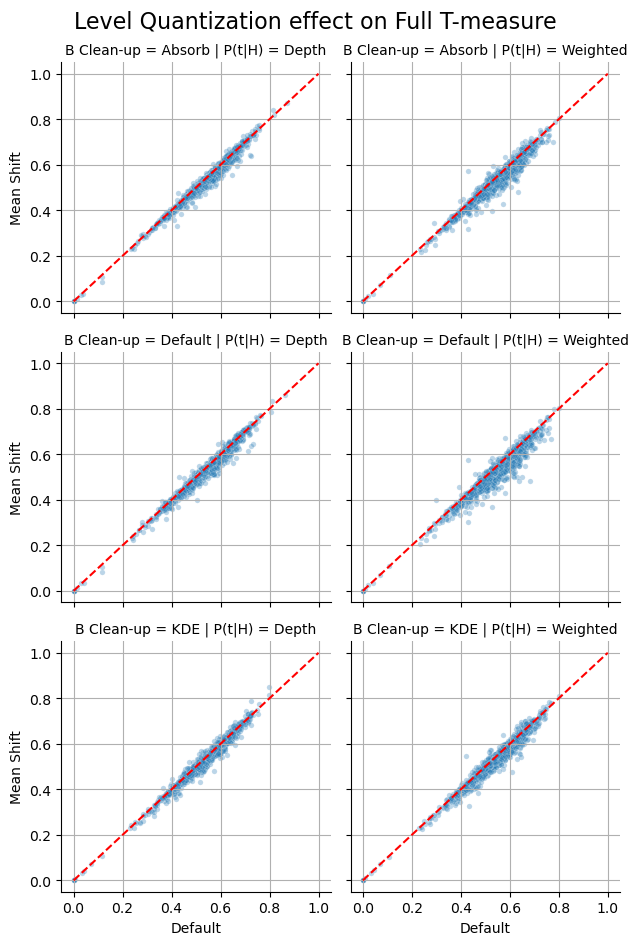

In [54]:
full_level = res.pivot_table(
    index=['tid', 'P(t|H)', 'B Clean-up'], 
    columns=['Level'], 
    values='t_full_f'
).reset_index()

g = sns.relplot(
    data=full_level, x="Default", y="Mean Shift", 
    col="P(t|H)", row="B Clean-up", 
    alpha=0.3, s=15,
    height=3.2, aspect=1, rasterized=True
)
for ax in g.axes.flat:
    ax.plot([0,1],[0,1], "r--")
    ax.grid(True)

plt.suptitle("Level Quantization effect on Full T-measure", fontsize=16)
plt.tight_layout()
plt.savefig("fullT_level.pdf")


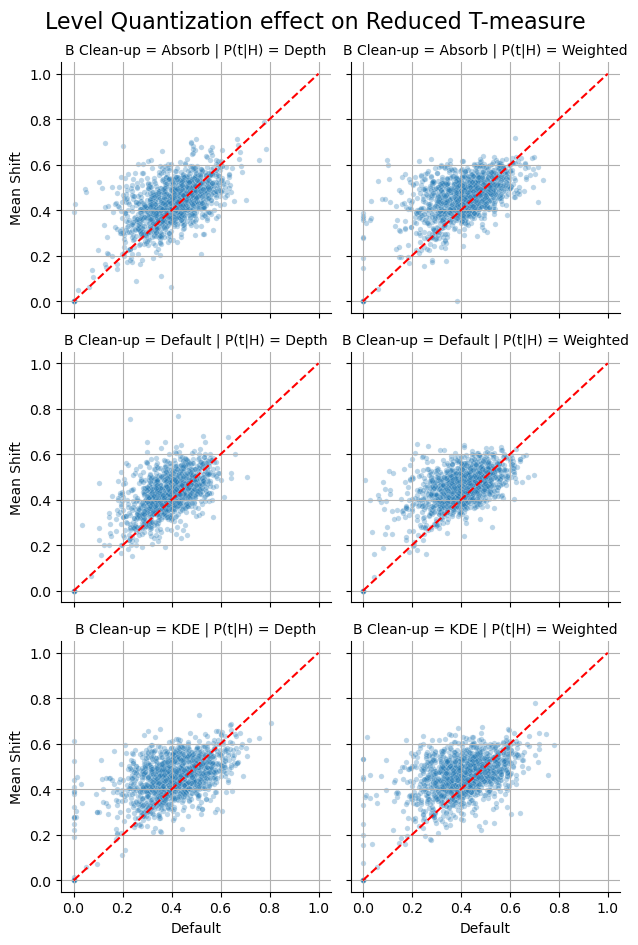

In [55]:
reduced_level = res.pivot_table(
    index=['tid', 'P(t|H)', 'B Clean-up'], 
    columns=['Level'], 
    values='t_reduced_f'
).reset_index()

g = sns.relplot(
    data=reduced_level, x="Default", y="Mean Shift", 
    col="P(t|H)", row="B Clean-up", 
    alpha=0.3, s=15,
    height=3.2, aspect=1,
    rasterized=True
)

for ax in g.axes.flat:
    ax.plot([0,1],[0,1], "r--")
    ax.grid(True)

plt.suptitle("Level Quantization effect on Reduced T-measure", fontsize=16)
plt.tight_layout()
plt.savefig("reducedT_level.pdf")

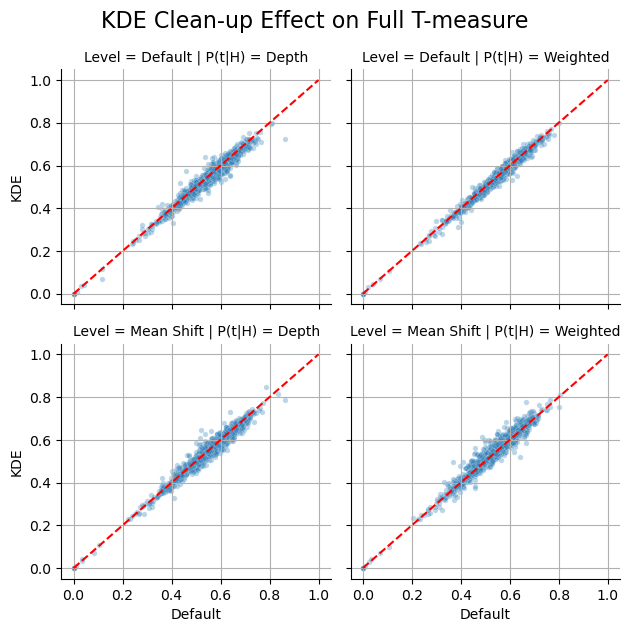

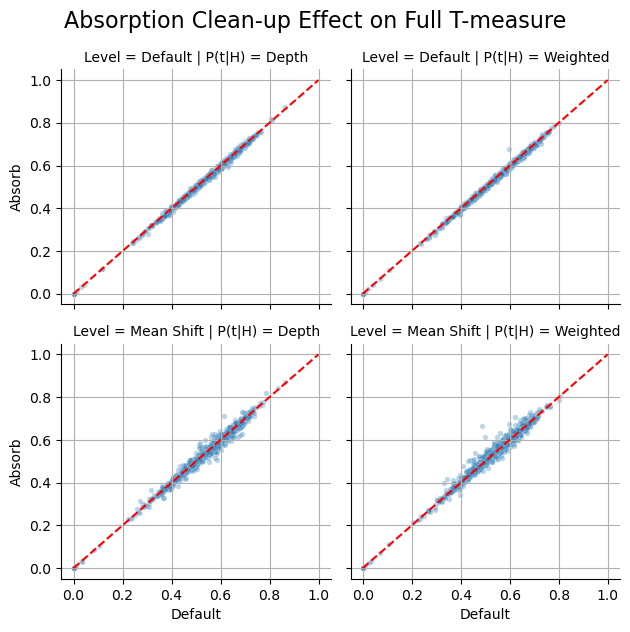

In [56]:
## Boundary cleaning has very little effects

full_bclean = res.pivot_table(
    index=['tid', 'P(t|H)', 'Level'], 
    columns=['B Clean-up'], 
    values='t_full_f'
).reset_index()

g = sns.relplot(
    data=full_bclean, x="Default", y="KDE", 
    col="P(t|H)", row="Level", 
    alpha=0.3, s=15,
    height=3.2, aspect=1,
    rasterized=True
)
for ax in g.axes.flat:
    ax.plot([0,1],[0,1], "r--")
    ax.grid(True)

plt.suptitle("KDE Clean-up Effect on Full T-measure", fontsize=16)
plt.tight_layout()
plt.savefig("fullT_kde.pdf")

g = sns.relplot(
    data=full_bclean, x="Default", y="Absorb", 
    col="P(t|H)", row="Level", 
    alpha=0.3, s=15,
    height=3.2, aspect=1,
    rasterized=True
)
for ax in g.axes.flat:
    ax.plot([0,1],[0,1], "r--")
    ax.grid(True)

plt.suptitle("Absorption Clean-up Effect on Full T-measure", fontsize=16)
plt.tight_layout()
plt.savefig("fullT_absorb.pdf")

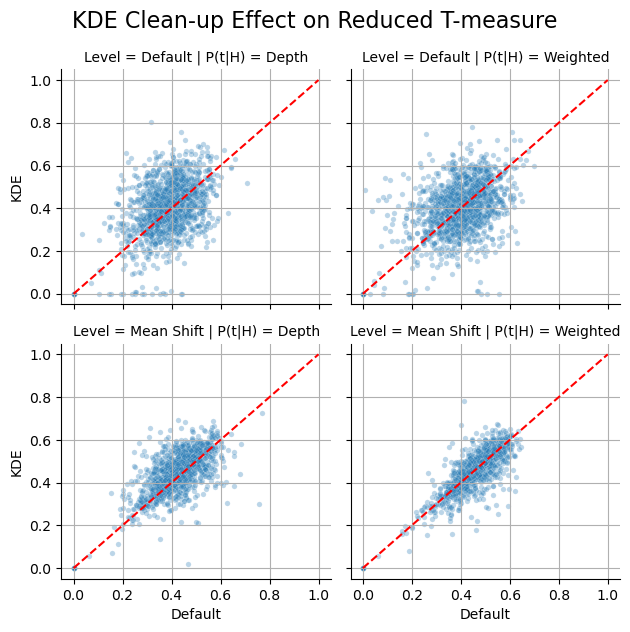

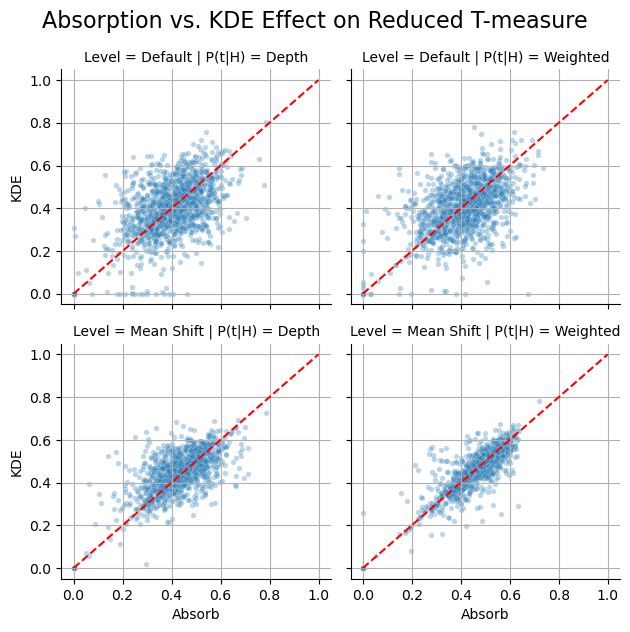

In [64]:
## Boundary cleaning has very little effects

reduced_bclean = res.pivot_table(
    index=['tid', 'P(t|H)', 'Level'], 
    columns=['B Clean-up'], 
    values='t_reduced_f'
).reset_index()

g = sns.relplot(
    data=reduced_bclean, x="Default", y="KDE", 
    col="P(t|H)", row="Level", 
    alpha=0.3, s=15,
    height=3.2, aspect=1,
    rasterized=True
)
for ax in g.axes.flat:
    ax.plot([0,1],[0,1], "r--")
    ax.grid(True)

plt.suptitle("KDE Clean-up Effect on Reduced T-measure", fontsize=16)
plt.tight_layout()
plt.savefig("reducedT_kde.pdf")

g = sns.relplot(
    data=reduced_bclean, x="Absorb", y="KDE", 
    col="P(t|H)", row="Level", 
    alpha=0.3, s=15,
    height=3.2, aspect=1,
    rasterized=True
)
for ax in g.axes.flat:
    ax.plot([0,1],[0,1], "r--")
    ax.grid(True)

plt.suptitle("Absorption vs. KDE Effect on Reduced T-measure", fontsize=16)
plt.tight_layout()
plt.savefig("reducedT_absorb_vs_kde.pdf")

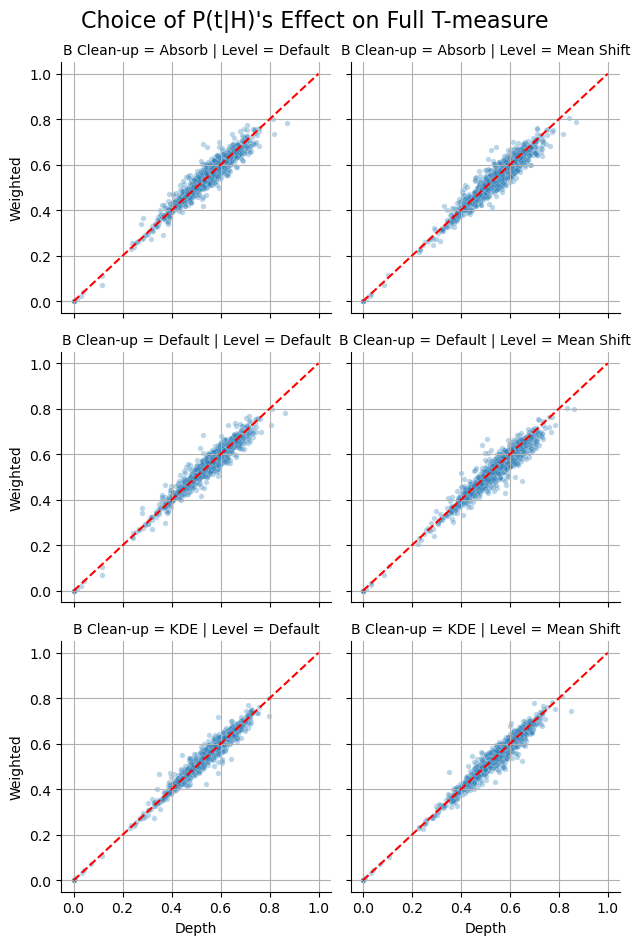

In [58]:
full_prom = res.pivot_table(
    index=['tid', 'Level', 'B Clean-up'], 
    columns=['P(t|H)'], 
    values='t_full_f'
).reset_index()

g = sns.relplot(
    data=full_prom, x="Depth", y="Weighted", 
    col="Level", row="B Clean-up", 
    alpha=0.3, s=15,
    height=3.2, aspect=1,
    rasterized=True
)

for ax in g.axes.flat:
    ax.plot([0,1],[0,1], "r--")
    ax.grid(True)

plt.suptitle("Choice of P(t|H)'s Effect on Full T-measure", fontsize=16)
plt.tight_layout()
plt.savefig("fullT_prominence.pdf")

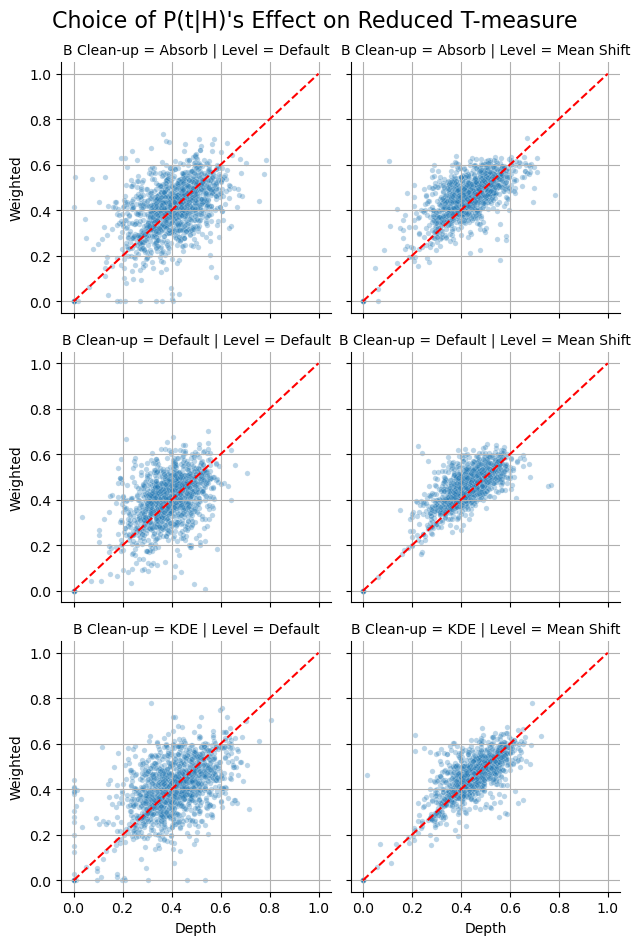

In [59]:
reduced_prom = res.pivot_table(
    index=['tid', 'Level', 'B Clean-up'], 
    columns=['P(t|H)'], 
    values='t_reduced_f'
).reset_index()

g = sns.relplot(
    data=reduced_prom, x="Depth", y="Weighted", 
    col="Level", row="B Clean-up", 
    alpha=0.3, s=15,
    height=3.2, aspect=1,
    rasterized=True
)

for ax in g.axes.flat:
    ax.plot([0,1],[0,1], "r--")
    ax.grid(True)

plt.suptitle("Choice of P(t|H)'s Effect on Reduced T-measure", fontsize=16)
plt.tight_layout()
plt.savefig("reducedT_prominence.pdf")